In [3]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from skimage import feature
from scipy import ndimage as ndi

In [9]:
gaussian = ndi.gaussian_filter(img, 4)

In [10]:
canny = cv2.Canny(gaussian,10,30)
cv2.imshow('canny',canny)
k = cv2.waitKey(0)
if k == 27:   # wait for ESC key to exit
    cv2.destroyAllWindows()
    cv2.waitKey(1)

## Contour Computation from Binary Image

In [69]:
# 

# im = cv2.imread('pink-panther.png')
im = cv2 .imread('ryan-allred.jpg')
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

cv2.imshow('imgray', imgray)
k = cv2.waitKey(0)
if k == 27:   # wait for ESC key to exit
    cv2.destroyAllWindows()
    cv2.waitKey(1)

ret, thresh = cv2.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.imshow('im2', im2)
k = cv2.waitKey(0)
if k == 27:   # wait for ESC key to exit
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    
# Let's try and find the contours of the binary image.

all_contours = cv2.drawContours(img, contours, -1, (0,255,0), 3)

cv2.imshow('all_contours', all_contours)
k = cv2.waitKey(0)
if k == 27:   # wait for ESC key to exit
    cv2.destroyAllWindows()
    cv2.waitKey(1)

## Contour Computation from Canny Edge Detection

In [45]:
# Test from here: 
# https://stackoverflow.com/questions/18074680/extract-single-line-contours-from-canny-edges?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
# img = cv2.imread("pink-panther.png", 0)
img = cv2.imread("ryan-allred.jpg", 0)

if img is None:
    raise Exception("Error while loading the image")

# Test to see if Gaussian Blurring helps decrease noise
# img = ndi.gaussian_filter(img, 4)

canny_img = cv2.Canny(img, 80, 150)
    
im2, contours, hierarchy = cv2.findContours(canny_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

scale = 10
contours_img = cv2.resize(contours_img, (0, 0), fx=scale, fy=scale)

for cnt in contours:
    color = np.random.randint(0, 255, (3)).tolist()
    cv2.drawContours(contours_img,[cnt*scale], 0, color, 10)

cv2.imwrite("canny.png", canny_img)
cv2.imwrite("contours.png", contours_img)

True

In [46]:
import pandas as pd
import seaborn as sns

x_values = []
y_values = []

for contour in contours:
    for pixel in contour:
        x_values.append(pixel[0][0])
        y_values.append(pixel[0][1])
        
pixel_list = pd.DataFrame(
    {'x': x_values,
     'y': y_values
    })

pixel_list.y = (-1*pixel_list.y)

pixel_list.head()

,x,y
0,977,-1619
1,977,-1620
2,977,-1621
3,977,-1622
4,977,-1623


In [47]:
pixel_list.shape

(122233, 2)

In [48]:
pixel_list_half = pixel_list.iloc[::2]
pixel_list_quarter = pixel_list_half.iloc[::2]
pixel_list_eighth = pixel_list_quarter.iloc[::2]
pixel_list_sixteenth = pixel_list_eighth.iloc[::2]
pixel_list_thirtysecond = pixel_list_sixteenth.iloc[::2]

Text(-5.244,0.5,'y pixels')

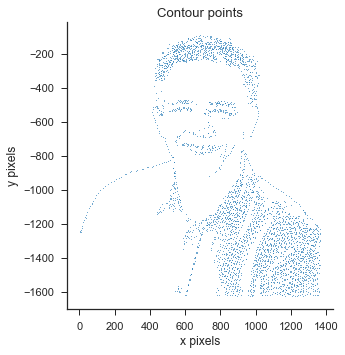

In [49]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('x', # Horizontal axis
           'y', # Vertical axis
           data=pixel_list_thirtysecond, # Data source
           fit_reg=False, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "s": 1}) # S marker size

# Set title
plt.title('Contour points')

# Set x-axis label
plt.xlabel('x pixels')

# Set y-axis label
plt.ylabel('y pixels')


# ax1 = pixel_list.plot.scatter(x='x', y='x', c='DarkBlue')